# LA POULE QUI CHANTE 

In [2]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import decomposition, preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px


In [3]:
sns.set()

## Chargement et nettoyage des données

Afin de réaliser cette étude de marché, nous allons nous servir de l'outil d'analyse PESTEL afin d'analyser les facteurs externes sont suceptibles d'impacter notre implantation sur un nouveau marché étranger :

des 6 critères PESTEL, nous allons retenir uniquement les trois les plus pertinents pour notre activité : 

- Politique : Il est primordial pour notre entreprise de s'implanter dans un pays dont la stabilité politique permet un déroulement serein de l'activité

- Économique : Le fleurissement de notre activité étant fortement lié au pouvoir d'achat des populations, ils est indispensable de s'attarder sur la dynamique économique des pays via l'évolutionde leur PIB

- Écologique : Dans un monde en pleine crise écologique, mesurer l'impact de notre future implantation en matière de rejet de CO2 associé a l'export de nos marchandises nous semble indispensable

Nous allons donc avoir besoin d'intégrer des données supplémentaires afin de pouvoir analyser ces 3 critères

### Referentiel code pays

On va ajouter un référentiel universel concernant les noms de pays afin de pouvoir fusionner toutes les données issues de sources différentes plus facilement : 

In [4]:
ref_pays = pd.read_excel('Iso3_FAO.xlsx')
ref_pays.rename(columns={'Code zone (ISO3)':'Code zone str','Code zone (FAO)':'Code zone num'}, inplace=True)
ref_pays

,Code zone str,Zone,Code zone num
0,AFG,Afghanistan,2
1,ZAF,Afrique du Sud,202
2,ALB,Albanie,3
3,DZA,Algérie,4
4,DEU,Allemagne,79
...,...,...,...
230,VEN,Venezuela,236
231,VNM,Viet Nam,237
232,YEM,Yémen,249
233,ZMB,Zambie,251


### Population

In [5]:
Population = pd.read_csv("Population_2000_2018.csv")

In [6]:
Population

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [7]:
Population.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object

In [8]:
Population['Zone'].nunique()

238

In [9]:
Population['Code Produit'].nunique()

1

In [10]:
Population['Valeur'].isnull().sum()

0

A l'aide des données presentes dans ce dataframe on peut calculer l'évolution démographique sur les dix dernières années de chacun des pays pour voir si le marché est porteur ou non d'un point de vue clients potentiels

On va calculer l'évolution de la démographie sur N-5 pour avoir l'exhaustivité des pays (certains pays ne présente pas la donnée a N-10 comme le Soudan par exemple)

In [11]:
Population = Population.pivot_table(index = ['Zone','Code zone'], columns = 'Année', values = 'Valeur')
Population['Croissance démographique (%)']= ((Population[2017]-Population[2012]) /(Population[2012])*100)
Population = Population.reset_index().rename_axis(None, axis=1)
Population

,Zone,Code zone,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Croissance démographique (%)
0,Afghanistan,2,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,...,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921,16.477889
1,Afrique du Sud,202,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,...,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518,7.906280
2,Albanie,3,3129.243,3129.704,3126.187,3118.023,3104.892,3086.810,3063.021,3033.998,...,2948.023,2928.592,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740,-1.026974
3,Algérie,4,31042.235,31451.514,31855.109,32264.157,32692.163,33149.724,33641.002,34166.972,...,35977.455,36661.445,37383.895,38140.133,38923.692,39728.025,40551.392,41389.189,42228.408,10.713956
4,Allemagne,79,81400.882,81453.885,81535.122,81614.380,81646.474,81602.741,81472.226,81277.830,...,80827.002,80855.632,80972.628,81174.367,81450.378,81787.411,82193.768,82658.409,83124.418,2.081915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Îles Salomon,25,412.660,423.944,435.432,447.017,458.539,469.918,481.078,492.132,...,527.861,541.521,556.063,571.336,587.079,603.118,619.438,636.039,652.857,14.382543
234,Îles Turques-et-Caïques,224,20.164,21.573,23.232,25.011,26.700,28.180,29.391,30.385,...,32.660,33.377,34.066,34.731,35.369,35.981,36.559,37.115,37.665,8.950273
235,Îles Vierges américaines,240,108.722,108.691,108.561,108.360,108.092,107.794,107.462,107.115,...,106.087,105.793,105.534,105.303,105.114,104.958,104.835,104.751,104.680,-0.741941
236,Îles Vierges britanniques,239,20.311,20.675,21.129,21.672,22.334,23.107,24.023,25.047,...,27.794,28.319,28.650,28.847,28.989,29.152,29.355,29.577,29.802,3.235602


In [12]:
Population_2017 = Population.loc[:,['Zone','Code zone',2017,'Croissance démographique (%)']]
Population_2017 = Population_2017.rename(columns={2017 : 'Population_2017', 'Code zone' : 'Code zone num'})
Population_2017

,Zone,Code zone num,Population_2017,Croissance démographique (%)
0,Afghanistan,2,36296.113,16.477889
1,Afrique du Sud,202,57009.756,7.906280
2,Albanie,3,2884.169,-1.026974
3,Algérie,4,41389.189,10.713956
4,Allemagne,79,82658.409,2.081915
...,...,...,...,...
233,Îles Salomon,25,636.039,14.382543
234,Îles Turques-et-Caïques,224,37.115,8.950273
235,Îles Vierges américaines,240,104.751,-0.741941
236,Îles Vierges britanniques,239,29.577,3.235602


In [13]:
Population_2017.isnull().sum()

Zone                            0
Code zone num                   0
Population_2017                 2
Croissance démographique (%)    2
dtype: int64

In [14]:
Population_2017.loc[Population_2017['Population_2017'].isnull()]

,Zone,Code zone num,Population_2017,Croissance démographique (%)
182,Serbie-et-Monténégro,186,NaN,NaN
191,Soudan (ex),206,NaN,NaN


On va supprimer ces deux pays de notre liste puisque leurs informations de démographie sont stockées sous d'autres noms de pays :

In [15]:
Population_2017 = Population_2017.drop([182, 191])

In [16]:
Population_2017.isnull().sum()

Zone                            0
Code zone num                   0
Population_2017                 0
Croissance démographique (%)    0
dtype: int64

### Disponibilité Alimentaire

In [17]:
DispoAlim = pd.read_csv("DisponibiliteAlimentaire_2017.csv")
DispoAlim.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [18]:
# périmètre de l'analyse
DispoAlim['Zone'].nunique()

174

In [19]:
#affichage des dimensions
DispoAlim['Élément'].unique().tolist()

['Production',
 'Importations - Quantité',
 'Variation de stock',
 'Exportations - Quantité',
 'Disponibilité intérieure',
 'Aliments pour animaux',
 'Semences',
 'Pertes',
 'Résidus',
 'Nourriture',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Disponibilité de protéines en quantité (g/personne/jour)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Traitement',
 'Autres utilisations (non alimentaire)',
 'Alimentation pour touristes']

In [20]:
#affichage des produits
DispoAlim['Produit'].unique().tolist()

['Blé et produits',
 'Riz et produits',
 'Orge et produits',
 'Maïs et produits',
 'Seigle et produits',
 'Avoine',
 'Millet et produits',
 'Sorgho et produits',
 'Céréales, Autres',
 'Pommes de Terre et produits',
 'Ignames',
 'Racines nda',
 'Sucre, canne',
 'Sucre, betterave',
 'Sucre Eq Brut',
 'Edulcorants Autres',
 'Miel',
 'Haricots',
 'Pois',
 'Légumineuses Autres et produits',
 'Noix et produits',
 'Soja',
 'Arachides Decortiquees',
 'Graines de tournesol',
 'Graines Colza/Moutarde',
 'Graines de coton',
 'Coco (Incl Coprah)',
 'Sésame',
 'Olives',
 'Plantes Oleiferes, Autre',
 'Huile de Soja',
 "Huile d'Arachide",
 'Huile de Tournesol',
 'Huile de Colza&Moutarde',
 'Huile Graines de Coton',
 'Huile de Palmistes',
 'Huile de Palme',
 'Huile de Coco',
 'Huile de Sésame',
 "Huile d'Olive",
 'Huile de Son de Riz',
 'Huile de Germe de Maïs',
 'Huil Plantes Oleif Autr',
 'Tomates et produits',
 'Oignons',
 'Légumes, Autres',
 'Oranges, Mandarines',
 'Citrons & Limes et produits',
 

In [21]:
DispoAlim['Zone'].nunique()

174

Création d'un dataframe Disponibilite Alimentaire spécifiquement filtré sur notre activité : la viande de volaille

In [22]:
Dispo_volaille = DispoAlim.loc[DispoAlim['Produit']== 'Viande de Volailles']
Dispo_volaille.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


Afin de pouvoir analyser les données liées a la gestion de la viande de volaille par pays on va pivoter la table sur l'index zone

In [23]:
Dispo_volaille = Dispo_volaille.pivot_table(index=['Zone','Code zone'], columns='Élément', values = 'Valeur')
Dispo_volaille = Dispo_volaille.reset_index().rename_axis(None, axis=1)
Dispo_volaille

,Zone,Code zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,2,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,202,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
2,Albanie,3,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,4,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,79,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,225,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0
168,Équateur,58,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0
169,États-Unis d'Amérique,231,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,0.0,NaN,77.0,80.0
170,Éthiopie,238,0.0,NaN,NaN,0.0,0.13,0.03,0.04,14.0,NaN,1.0,14.0,1.0,14.0,0.0,NaN,NaN,0.0


On semble perdre deux pays par rapport au df Dispo Alimentaire initial :

In [24]:
paysdispovolaille = Dispo_volaille.reset_index()['Zone'].tolist()
pays_dispo_alim = DispoAlim['Zone'].unique().tolist()
pays_absents_dans_dispovolaille = [pays for pays in pays_dispo_alim if pays not in paysdispovolaille]
print("Pays présents dans pays_dispo_alim mais pas dans paysdispovolaille :")
print(pays_absents_dans_dispovolaille)

Pays présents dans pays_dispo_alim mais pas dans paysdispovolaille :
['Bermudes', 'Brunéi Darussalam']


In [25]:
DispoAlim.loc[(DispoAlim['Zone'] == 'Brunéi Darussalam') & (DispoAlim['Produit'] == 'Viande de Volailles'),:].head(50)
# DispoAlim.loc[(DispoAlim['Zone'] == 'Bermudes') & (DispoAlim['Produit'] == 'Viande de Volailles'),:].head(50)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole


Il semblerait que ce soit deux pays dont la production et l'important de viande de vollaille est inconnue, etant donné leur extrêmement faible population nous n'allons pas les prendre en compte dans notre analyse

On va ensuite analyser plus en détail notre dataframe pivoté afin de faire un état des lieux des données concernant nos différentes dimensions : 

In [26]:
Dispo_volaille.isnull().sum()

Zone                                                               0
Code zone                                                          0
Alimentation pour touristes                                       94
Aliments pour animaux                                            171
Autres utilisations (non alimentaire)                            138
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           2
Exportations - Quantité                                           37
Importations - Quantité                                            2
Nourriture                                                         2
Pertes                                                           105
Production                        

On constate un certain volume de valeurs nulles, voyons l'ampleur de ces trous dans les données

Dans les données vides on semble rencontrer deux cas de figure : 
- Des variables dont la valeur n'est pas pertinente vis a vis de notre focus sur la partie volaille (Aliments pour animaux, Semences, Traitement, Autres utilisations (non alimentaire))
- Des variables pertinentes mais dont l'information n'est pas retrasncrite dans le fichier (Exportations, Alimentation pour touristes)

In [27]:
#on va vérifier les valeurs pour les variables non pertinentes afin de s'assurer que leur suppression est la bonne option
# Dispo_volaille['Aliments pour animaux'].sort_values(ascending=False)
# Dispo_volaille['Autres utilisations (non alimentaire)'].sort_values(ascending=False).head(30)
# Dispo_volaille['Semences'].sort_values(ascending=False).head(30)
# Dispo_volaille['Traitement'].sort_values(ascending=False).head(30)
Dispo_volaille['Exportations - Quantité'].sort_values(ascending=False).head(30)
# Dispo_volaille['Alimentation pour touristes'].sort_values(ascending=False).head(30)

21     4223.0
169    3692.0
117    1418.0
119    1025.0
151     796.0
31      663.0
16      656.0
4       646.0
34      576.0
51      501.0
157     429.0
124     359.0
158     273.0
46      212.0
65      210.0
8       207.0
73      183.0
29      163.0
24      152.0
42      139.0
30      115.0
52      115.0
167      94.0
70       93.0
11       78.0
123      69.0
86       68.0
1        63.0
68       45.0
22       45.0
Name: Exportations - Quantité, dtype: float64

Suite à une analyse successive des valeurs des différentes dimensions concernées par les valeurs nulles, on va prendre les décisions suivante : 

- Aliments pour Animaux : une seule valeur a 0, le reste en Nan, on supprime la colonne. 

- Autres utilisations (non alimentaire) : 20 valeurs renseignées sur 172 pays, dont plus de la moitié sous la barre des 10 tonnes, on supprime

- Semences : Toutes les valeurs Nan ou 0, on supprime

- Traitements : Seulement 46 pays avec une valeur renseignée dont seulement 18 avec une valeur supérieur a 10 Tonnes, on supprime

- Alimentation pour touristes : A peine 50% des pays présentent une valeur concernant cette information et seulement 16 présentent un resultat supérieur à 0, on supprime.

Pour les autre colonnes, afin de ne pas impacter notre travail de clustering, on va remplacer les valeurs nulles par 0

In [28]:
Dispo_volaille = Dispo_volaille.drop(columns=['Aliments pour animaux','Autres utilisations (non alimentaire)','Semences','Alimentation pour touristes'])

In [29]:
numeric_columns = Dispo_volaille.select_dtypes(include='number').columns
# Dispo_volaille[numeric_columns] = Dispo_volaille[numeric_columns].fillna(Dispo_volaille[numeric_columns].mean())
Dispo_volaille[numeric_columns] = Dispo_volaille[numeric_columns].fillna(0)
Dispo_volaille.rename(columns={'Code zone':'Code zone num'}, inplace=True)
Dispo_volaille

,Zone,Code zone num,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock
0,Afghanistan,2,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,2.0,28.0,0.0,0.0,0.0
1,Afrique du Sud,202,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,0.0,0.0
2,Albanie,3,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,0.0,13.0,0.0,0.0,4.0
3,Algérie,4,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.0,0.0
4,Allemagne,79,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,0.0,1514.0,-38.0,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,225,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,0.0,48.0,0.0,0.0,-26.0
168,Équateur,58,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,0.0,-1.0
169,États-Unis d'Amérique,231,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,0.0,21914.0,0.0,77.0,80.0
170,Éthiopie,238,0.0,0.13,0.03,0.04,14.0,0.0,1.0,14.0,1.0,14.0,0.0,0.0,0.0


### PIB

In [30]:
PIB = pd.read_excel("EVOL_PIB_MOND_V2.xlsx")
PIB.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,PIB ($ US courants),NY.GDP.MKTP.CD,1.873453e+09,1.896457e+09,1.961844e+09,2.044112e+09,2.254831e+09,2.360017e+09,...,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09


In [31]:
PIB.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
2022              float64
dtype: object

In [32]:
# Normalisation des noms de colonnes pour merge
PIB.rename(columns={'Country Name':'Zone','Country Code':'Code zone str'}, inplace=True)
PIB.drop(columns={'Indicator Name','Indicator Code'}, inplace=True)

In [33]:
# Passage du PIB en millions de dollars afin d'en faciliter la lecture
columns_to_divide = ['2000', '2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
PIB[columns_to_divide] = round(PIB[columns_to_divide].div(1000000),2)
# Calcul d'un taux d'evolution du PIB entre 2017 et 2012
PIB['Croissance PIB (%)']= ((PIB['2017']-PIB['2012']) /(PIB['2012'])*100)

In [34]:
PIB.head()

,Zone,Code zone str,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Croissance PIB (%)
0,Aruba,ABW,1873.45,1896.46,1961.84,2044.11,2254.83,2360.02,2469.78,2677.64,...,2790.85,2962.91,2983.64,3092.43,3276.18,3395.80,2558.91,3103.18,3544.71,18.247865
1,Afghanistan,AFG,NaN,NaN,3825.70,4520.95,5224.90,6203.26,6971.76,9747.89,...,20497.13,19134.22,18116.57,18753.46,18053.22,18799.44,19955.93,14266.50,NaN,-5.796207
2,Angola,AGO,9129.59,8936.08,15285.59,17812.70,23552.06,36970.90,52381.03,65266.42,...,135966.80,90496.42,52761.62,73690.16,79450.69,70897.96,48501.56,66505.13,106782.77,-42.453354
3,Albanie,ALB,3480.36,3922.10,4348.07,5611.50,7184.69,8052.08,8896.08,10677.32,...,13228.15,11386.85,11861.20,13019.73,15156.42,15401.83,15162.73,17930.57,18916.38,5.681085
4,Andorre,AND,1429.05,1546.91,1755.99,2361.64,2895.05,3159.83,3456.26,3952.40,...,3271.69,2789.88,2896.61,3000.16,3218.42,3155.15,2891.00,3325.14,3352.03,-5.911279


### Distances export

In [35]:
Distances = pd.read_excel("dist_cepii.xlsx")
Distances.head()

,iso_o,iso_d,contig,comlang_off,comlang_ethno,colony,comcol,curcol,col45,smctry,dist,distcap,distw,distwces
0,ABW,ABW,0,0,0,0,0,0,0,0,5.225315,5.225315,25.09354,23.04723
1,ABW,AFG,0,0,0,0,0,0,0,0,13257.810000,13257.810000,13168.22,13166.37
2,ABW,AGO,0,0,0,0,0,0,0,0,9516.913000,9516.913000,9587.316,9584.193
3,ABW,AIA,0,0,1,0,0,0,0,0,983.268200,983.268200,976.8974,976.8916
4,ABW,ALB,0,0,0,0,0,0,0,0,9091.742000,9091.742000,9091.576,9091.466


In [36]:
#on vient filtrer le dataframe pour n'avoir les distances que depuis la France
Distances = Distances.loc[Distances['iso_o']== 'FRA',['iso_o','iso_d','dist','distcap','distw','distwces']]
Distances

,iso_o,iso_d,dist,distcap,distw,distwces
15008,FRA,ABW,7685.884,7685.884,7716.752,7711.83
15009,FRA,AFG,5590.381,5590.381,5500.665,5489.888
15010,FRA,AGO,6510.322,6510.322,6384.805,6363.6
15011,FRA,AIA,6710.570,6710.570,6743.427,6737.844
15012,FRA,ALB,1603.534,1603.534,1499.451,1461.321
...,...,...,...,...,...,...
15228,FRA,MNE,1930.020,1930.020,1930.02,1930.02
15229,FRA,ZAF,9353.552,8692.812,8769.679,8750.608
15230,FRA,ZAR,6049.656,6049.656,6036.588,5995.903
15231,FRA,ZMB,7604.841,7604.841,7236.737,7221.197


In [37]:
#on vient également charger le referentiel pays afin de fusionnner par la suite
pays = pd.read_excel("geo_cepii.xlsx")
pays.rename(columns={'iso3':'iso_d'}, inplace=True)
pays.head()

,iso2,iso_d,cnum,country,pays,area,dis_int,landlocked,continent,city_en,...,lang9_2,lang9_3,lang9_4,colonizer1,colonizer2,colonizer3,colonizer4,short_colonizer1,short_colonizer2,short_colonizer3
0,AW,ABW,533,Aruba,Aruba,193.0,5.225315,0.0,America,Oranjestad,...,.,.,.,NLD,.,.,.,.,.,.
1,AF,AFG,4,Afghanistan,Afghanistan,652225.0,303.761400,1.0,Asia,Kabul,...,Uzbek,.,.,.,.,.,.,GBR,.,.
2,AO,AGO,24,Angola,Angola,1246700.0,419.966600,0.0,Africa,Luanda,...,.,.,.,PRT,.,.,.,.,.,.
3,AI,AIA,660,Anguilla,Anguilla,102.0,3.798690,0.0,America,The Valley,...,.,.,.,GBR,.,.,.,.,.,.
4,AL,ALB,8,Albania,Albanie,28748.0,63.773110,0.0,Europe,Tirana,...,.,.,.,TUR,.,.,.,.,.,.


In [38]:
Distances = Distances.merge(pays[['iso_d','pays']], on='iso_d', how='left')

In [39]:
# on va drop toutes les colonnes superflues afin de ne conserver que le nom de pays, l'id ISO 3611 ainsi que la distance en km
Distances.drop(columns={'iso_o','distcap','distw','distwces'},inplace=True)

In [40]:
# on normalise le nom des colonnes
Distances.rename(columns={'iso_d':'Code zone str','pays':'Zone','dist':'Distance (km)'},inplace=True)

In [41]:
# on supprime les doublons
Distances.drop_duplicates(inplace=True)
Distances

,Code zone str,Distance (km),Zone
0,ABW,7685.884,Aruba
1,AFG,5590.381,Afghanistan
2,AGO,6510.322,Angola
3,AIA,6710.570,Anguilla
4,ALB,1603.534,Albanie
...,...,...,...
232,MNE,1930.020,Monéténgro
233,ZAF,9353.552,Afrique du Sud
235,ZAR,6049.656,"Congo, Rép. dém. du"
236,ZMB,7604.841,Zambie


### Stabilité Politique

In [42]:
Stab_politique = pd.read_csv('Stab_politique.csv')

In [43]:
# on va pivoter la table pour avoir une valeur de stabilité par pays et par années
Stab_politique = Stab_politique.pivot_table(index = ['Zone','Code zone (FAO)'], columns = 'Année', values = 'Valeur')
# on va en profiter pour calculer un indicateur d'évolution de la stabilité politique, toujours entre 2012 et 2017
Stab_politique['Evolution stabilite politique (%)']= round(((Stab_politique[2017] - Stab_politique[2012]) / abs(Stab_politique[2012])) * 100,2)
Stab_politique = Stab_politique.reset_index().rename_axis(None, axis=1)
Stab_politique.rename(columns={'Code zone (FAO)':'Code zone num'}, inplace=True)
Stab_politique

,Zone,Code zone num,2000,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Evolution stabilite politique (%)
0,Afghanistan,2,-2.44,-2.04,-2.20,-2.30,-2.07,-2.22,-2.41,-2.69,...,-2.42,-2.52,-2.41,-2.57,-2.67,-2.80,-2.76,-2.66,-2.71,-15.70
1,Afrique du Sud,202,-0.23,-0.25,-0.31,-0.13,-0.16,0.05,0.22,0.05,...,-0.03,-0.05,-0.15,-0.21,-0.14,-0.28,-0.23,-0.27,-0.24,-833.33
2,Albanie,3,-0.54,-0.30,-0.31,-0.43,-0.51,-0.51,-0.20,-0.03,...,-0.14,0.09,0.49,0.35,0.34,0.38,0.37,0.11,0.09,371.43
3,Algérie,4,-1.43,-1.63,-1.75,-1.36,-0.91,-1.13,-1.15,-1.10,...,-1.33,-1.20,-1.19,-1.09,-1.10,-0.92,-0.84,-1.04,-0.84,30.83
4,Allemagne,79,1.41,1.10,0.58,0.64,0.89,1.03,1.00,0.94,...,0.78,0.93,0.93,0.70,0.68,0.59,0.59,0.57,0.68,-24.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Érythrée,178,-0.77,-0.27,-0.72,-0.64,-0.80,-0.90,-1.05,-0.71,...,-0.70,-0.77,-0.81,-0.88,-0.66,-0.73,-0.61,-0.70,-0.98,-4.29
192,États-Unis d'Amérique,231,1.08,0.29,0.08,-0.23,-0.06,0.49,0.37,0.58,...,0.63,0.64,0.58,0.68,0.40,0.29,0.42,0.13,0.03,-53.97
193,Éthiopie,238,-0.95,-1.23,-1.41,-1.31,-1.69,-1.74,-1.81,-1.73,...,-1.56,-1.41,-1.34,-1.50,-1.62,-1.68,-1.28,-1.31,-1.76,-7.69
194,Îles Marshall,127,NaN,NaN,1.17,1.13,1.07,1.04,1.09,1.01,...,1.03,1.05,0.99,0.92,0.21,0.87,0.73,0.76,0.63,-15.53


### Fusion

On va créer un df fusionné qui compile les données de chaque pays enrichie avec des informations supplémentaires : 
- La population du pays sur l'année 2017
- La stabilité politique en 2017
- Le PIB en 2017
- La distance de trajet entre la France et le pays concerné

In [44]:
DF1 = ref_pays.merge(Dispo_volaille, on='Code zone num', how='left')
DF2 = DF1.merge(Population_2017[['Code zone num','Population_2017','Croissance démographique (%)']],on=('Code zone num'), how='left')
DF3 = DF2.merge(PIB[['Code zone str','2017','Croissance PIB (%)']],on=('Code zone str'), how='left')
DF3.rename(columns={'2017':'PIB_2017 (Millions de $ US courants)'}, inplace=True)
DF4 = DF3.merge(Distances[['Code zone str','Distance (km)']],on=('Code zone str'), how='left')# 
DF_fusionne = DF4.merge(Stab_politique[['Code zone num',2017,'Evolution stabilite politique (%)']],on=('Code zone num'), how='left')
DF_fusionne.rename(columns={2017:'Stabilite_politique_2017'}, inplace=True)
DF_fusionne

,Code zone str,Zone_x,Code zone num,Zone_y,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,...,Résidus,Traitement,Variation de stock,Population_2017,Croissance démographique (%),PIB_2017 (Millions de $ US courants),Croissance PIB (%),Distance (km),Stabilite_politique_2017,Evolution stabilite politique (%)
0,AFG,Afghanistan,2,Afghanistan,5.0,1.53,0.33,0.54,57.0,0.0,...,0.0,0.0,0.0,36296.113,16.477889,18753.46,-5.796207,5590.3810,-2.80,-15.70
1,ZAF,Afrique du Sud,202,Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.0,...,0.0,0.0,0.0,57009.756,7.906280,381448.81,-12.189612,9353.5520,-0.28,-833.33
2,ALB,Albanie,3,Albanie,85.0,16.36,6.45,6.26,47.0,0.0,...,0.0,0.0,4.0,2884.169,-1.026974,13019.73,5.681085,1603.5340,0.38,371.43
3,DZA,Algérie,4,Algérie,22.0,6.38,1.50,1.97,277.0,0.0,...,0.0,0.0,0.0,41389.189,10.713956,170096.99,-18.636880,1340.3900,-0.92,30.83
4,DEU,Allemagne,79,Allemagne,71.0,19.47,4.16,7.96,1739.0,646.0,...,-38.0,167.0,-29.0,82658.409,2.081915,3690849.15,4.641319,439.8984,0.59,-24.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,VEN,Venezuela,236,Venezuela (République bolivarienne du),71.0,20.28,4.39,7.23,626.0,0.0,...,0.0,0.0,-1.0,29402.484,0.141845,NaN,NaN,7618.8600,-1.27,-23.30
231,VNM,Viet Nam,237,Viet Nam,48.0,12.33,3.40,4.01,1206.0,1.0,...,0.0,0.0,2.0,94600.648,5.343674,281353.61,43.848183,9208.5540,0.23,-14.81
232,YEM,Yémen,249,Yémen,30.0,8.53,1.85,3.04,246.0,0.0,...,0.0,0.0,0.0,27834.819,13.736022,26842.23,-24.177340,5317.2610,-2.94,-20.99
233,ZMB,Zambie,251,Zambie,11.0,3.42,0.72,1.15,60.0,1.0,...,0.0,0.0,0.0,16853.599,16.511747,25873.60,1.452924,7604.8410,0.15,-77.27


In [45]:
# on va ensuite vérifier le bon fonctionnement de nos fusions successives
DF_fusionne.isnull().sum()

Code zone str                                                     0
Zone_x                                                            0
Code zone num                                                     0
Zone_y                                                           63
Disponibilité alimentaire (Kcal/personne/jour)                   63
Disponibilité alimentaire en quantité (kg/personne/an)           63
Disponibilité de matière grasse en quantité (g/personne/jour)    63
Disponibilité de protéines en quantité (g/personne/jour)         63
Disponibilité intérieure                                         63
Exportations - Quantité                                          63
Importations - Quantité                                          63
Nourriture                                                       63
Pertes                                                           63
Production                                                       63
Résidus                                         

In [46]:
# on va venir supprimer les colonnes inutiles ainsi que certaines valeurs nulles
DF_fusionne.dropna(subset=['Zone_y'], inplace=True)
DF_fusionne.drop(columns={'Zone_x'},inplace=True)
DF_fusionne.rename(columns={'Zone_y':'Zone'},inplace=True)

In [47]:
DF_fusionne['Zone'].tolist()

['Afghanistan',
 'Afrique du Sud',
 'Albanie',
 'Algérie',
 'Allemagne',
 'Angola',
 'Antigua-et-Barbuda',
 'Arabie saoudite',
 'Argentine',
 'Arménie',
 'Australie',
 'Autriche',
 'Azerbaïdjan',
 'Bahamas',
 'Bangladesh',
 'Barbade',
 'Bélarus',
 'Belgique',
 'Belize',
 'Bénin',
 'Bolivie (État plurinational de)',
 'Bosnie-Herzégovine',
 'Botswana',
 'Brésil',
 'Bulgarie',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodge',
 'Cameroun',
 'Canada',
 'Chili',
 'Chine - RAS de Hong-Kong',
 'Chine - RAS de Macao',
 'Chine, continentale',
 'Chine, Taiwan Province de',
 'Chypre',
 'Colombie',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatie',
 'Cuba',
 'Danemark',
 'Djibouti',
 'Dominique',
 'Égypte',
 'El Salvador',
 'Émirats arabes unis',
 'Équateur',
 'Espagne',
 'Estonie',
 'Eswatini',
 "États-Unis d'Amérique",
 'Éthiopie',
 'Fédération de Russie',
 'Fidji',
 'Finlande',
 'France',
 'Gabon',
 'Gambie',
 'Géorgie',
 'Ghana',
 'Grèce',
 'Grenade',
 'Guatemala',
 'Guinée',
 'Guinée-Bissau',
 

In [48]:
# on re-vérifie la présence d'anomalies suite a ce premier nettoyage :
DF_fusionne.isnull().sum()

Code zone str                                                    0
Code zone num                                                    0
Zone                                                             0
Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Exportations - Quantité                                          0
Importations - Quantité                                          0
Nourriture                                                       0
Pertes                                                           0
Production                                                       0
Résidus                                                          0
Traitement                                                    

In [49]:
PIb_val_nulles = DF_fusionne.loc[DF_fusionne['PIB_2017 (Millions de $ US courants)'].isnull(), 'Zone'].tolist()
PIb_val_nulles

['Chine, Taiwan Province de',
 'République populaire démocratique de Corée',
 'Venezuela (République bolivarienne du)']

Après quelques recherches réaliseés sur la raison de ces absences de valeurs, on va appliquer les décisions suivantes : 

- On va Supprimer la Corée du Nord ('République populaire démocratique de Corée') de notre dataframe puisqu'on ne souhaite pas faire de business avec une dictature

- Le Venezuela s'est enfoncé dans une grave crise économique après 2014, son PIB n'est plus disponible après cette date, on va le supprimer car inutile d'essayer de s'implanter dans un pays en crise

- On va également supprimer Taïwan de par la situation géopolitque avec la Chine qui n'est pas propice à une implantation commerciale

In [50]:
DF_fusionne.loc[DF_fusionne['Zone'].isin(PIb_val_nulles),:]

,Code zone str,Code zone num,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,...,Résidus,Traitement,Variation de stock,Population_2017,Croissance démographique (%),PIB_2017 (Millions de $ US courants),Croissance PIB (%),Distance (km),Stabilite_politique_2017,Evolution stabilite politique (%)
44,TWN,214,"Chine, Taiwan Province de",126.0,33.17,8.70,11.01,785.0,8.0,161.0,...,0.0,0.0,20.0,23674.546,1.403399,NaN,NaN,9834.232,NaN,NaN
180,PRK,116,République populaire démocratique de Corée,8.0,1.62,0.63,0.49,43.0,0.0,0.0,...,0.0,0.0,0.0,25429.825,2.536950,NaN,NaN,8783.568,-0.50,-4900.0
230,VEN,236,Venezuela (République bolivarienne du),71.0,20.28,4.39,7.23,626.0,0.0,25.0,...,0.0,0.0,-1.0,29402.484,0.141845,NaN,NaN,7618.860,-1.27,-23.3


In [51]:
DF_fusionne.drop([44,180,230],inplace=True)

In [52]:
Stab_pol_null = DF_fusionne.loc[DF_fusionne['Stabilite_politique_2017'].isnull(), 'Zone'].tolist()
Stab_pol_null

['Chine, continentale', 'Nouvelle-Calédonie', 'Polynésie française']

In [53]:
DF_fusionne.loc[DF_fusionne['Zone'].isin(Stab_pol_null),:]

,Code zone str,Code zone num,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,...,Résidus,Traitement,Variation de stock,Population_2017,Croissance démographique (%),PIB_2017 (Millions de $ US courants),Croissance PIB (%),Distance (km),Stabilite_politique_2017,Evolution stabilite politique (%)
43,CHN,41,"Chine, continentale",59.0,12.33,4.67,3.96,18161.0,576.0,452.0,...,-1.0,1.0,-50.0,1421021.791,2.659675,12310491.33,44.282980,8225.232,NaN,NaN
154,NCL,153,Nouvelle-Calédonie,136.0,38.71,8.42,14.05,11.0,0.0,9.0,...,0.0,0.0,-1.0,277.150,6.329104,9174.05,-5.022181,16757.740,NaN,NaN
169,PYF,70,Polynésie française,167.0,47.40,10.86,16.20,15.0,0.0,15.0,...,0.0,0.0,0.0,276.102,2.640912,5833.35,2.467828,15724.430,NaN,NaN


On va appliquer les corrections suivantes : 

- On va utiliser les valeurs de la France métropolitaine pour la Nouvelle-Calédonie et la Polynésie Française

- Concernant la Chine, a défaut d'avoir la valeur disponible on va utiliser la moyenne de l'ensemble des valeurs de la colonne

In [54]:
DF_fusionne.loc[154,'Stabilite_politique_2017'] = 0.28
DF_fusionne.loc[169,'Stabilite_politique_2017'] = 0.28

In [55]:
numeric_columns = DF_fusionne.select_dtypes(include='number').columns
DF_fusionne[numeric_columns] = DF_fusionne[numeric_columns].fillna(DF_fusionne[numeric_columns].mean())
DF_fusionne.isnull().sum()

Code zone str                                                    0
Code zone num                                                    0
Zone                                                             0
Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Exportations - Quantité                                          0
Importations - Quantité                                          0
Nourriture                                                       0
Pertes                                                           0
Production                                                       0
Résidus                                                          0
Traitement                                                    

### Choix des dimensions pour clustering

Afin de pouvoir réaliser notre travail de regroupement dans les meilleurs conditions possible nous allons filtrer notre dataframe enrichi sur les dimensions suivantes : 

- Disponibilité alimentaire en quantité (kg/personne/an)
- Production
- Importations - Quantité
- Exportations - Quantité
- Population_2017
- PIB_2017 (Millions de $ US courants)
- Distance (km)
- Stabilite_politique_2017

L'objectif etant de ne travailler que sur des données primaires (non transformées) et de conserver les variables les plus pertinentes concernant notre activité (dispo alimentaire, importations, exportations, production) et concernant le contexte des pays dans lesquels on va se projet (stabilité politique, PIB, population, distance depuis la france)

In [56]:
DF_clustering = DF_fusionne.loc[:,['Zone','Disponibilité alimentaire en quantité (kg/personne/an)','Production','Importations - Quantité','Exportations - Quantité','Population_2017','PIB_2017 (Millions de $ US courants)','Distance (km)','Stabilite_politique_2017']]
DF_clustering

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017
0,Afghanistan,1.53,28.0,29.0,0.0,36296.113,18753.46,5590.3810,-2.80
1,Afrique du Sud,35.69,1667.0,514.0,63.0,57009.756,381448.81,9353.5520,-0.28
2,Albanie,16.36,13.0,38.0,0.0,2884.169,13019.73,1603.5340,0.38
3,Algérie,6.38,275.0,2.0,0.0,41389.189,170096.99,1340.3900,-0.92
4,Allemagne,19.47,1514.0,842.0,646.0,82658.409,3690849.15,439.8984,0.59
...,...,...,...,...,...,...,...,...,...
229,Vanuatu,11.66,1.0,4.0,0.0,285.510,880.06,16346.3500,0.70
231,Viet Nam,12.33,918.0,291.0,1.0,94600.648,281353.61,9208.5540,0.23
232,Yémen,8.53,168.0,78.0,0.0,27834.819,26842.23,5317.2610,-2.94
233,Zambie,3.42,49.0,12.0,1.0,16853.599,25873.60,7604.8410,0.15


In [57]:
DF_clustering = DF_clustering.set_index('Zone')

### Nettoyage des valeurs extrêmes

Observons la distribution des valeurs de nos KPI principaux : 

- Disponibilité alimentaire en quantité (kg/personne/an)
- Production
- Importations - Quantité
- Exportations - Quantité
- Population_2017
- PIB_2017 (Millions de $ US courants)
- Distance (km)
- Stabilite_politique_2017

afin de nous assurer que les données sont assez bien distribuées pour permettre un clustering pertinent

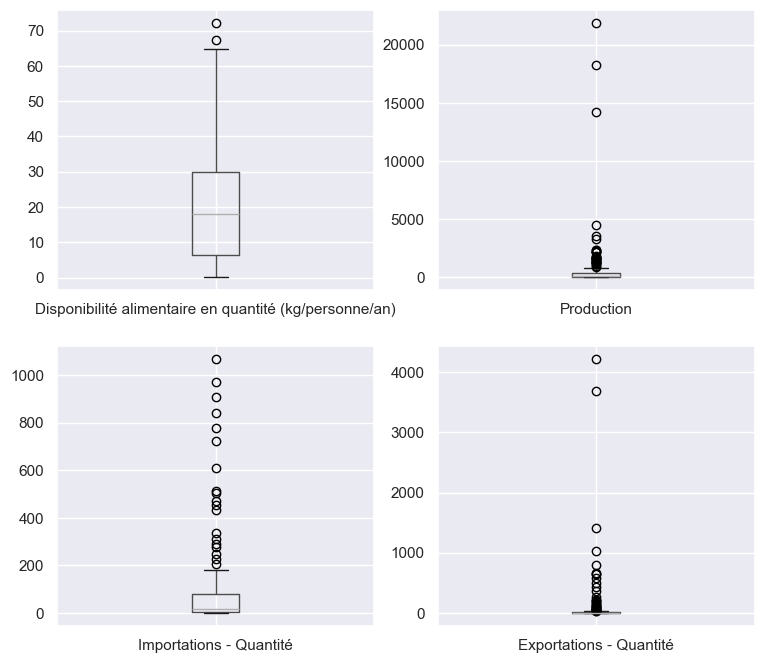

In [58]:
# Afficher des boxplot
plt.figure(figsize=(9, 8))
plt.subplot(221)
DF_clustering.boxplot(column = 'Disponibilité alimentaire en quantité (kg/personne/an)')
plt.subplot(222)
DF_clustering.boxplot(column = 'Production')
plt.subplot(223)
DF_clustering.boxplot(column = 'Importations - Quantité')
plt.subplot(224)
DF_clustering.boxplot(column = 'Exportations - Quantité')
plt.show()

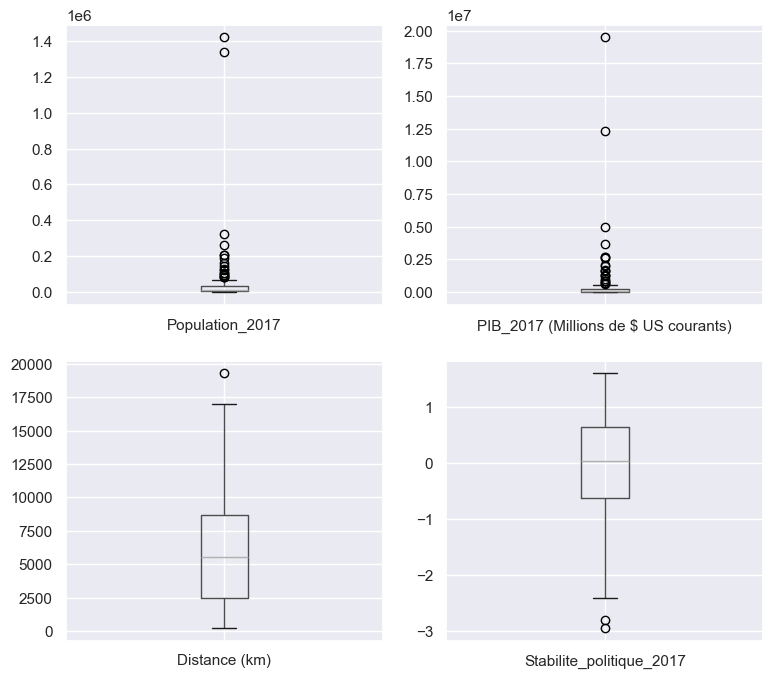

In [59]:
# Afficher des boxplot
plt.figure(figsize=(9, 8))
plt.subplot(221)
DF_clustering.boxplot(column = 'Population_2017')
plt.subplot(222)
DF_clustering.boxplot(column = 'PIB_2017 (Millions de $ US courants)')
plt.subplot(223)
DF_clustering.boxplot(column = 'Distance (km)')
plt.subplot(224)
DF_clustering.boxplot(column = 'Stabilite_politique_2017')
plt.show()

On constate que la répartition de nos valeurs est très inégale, notamment concernant le PIB, la population, la production, les exportations et les importations. 

On va creuser pour voir quels sont les pays qui présentent des valeurs extrêmes :

In [60]:
DF_clustering['PIB_2017 (Millions de $ US courants)'].sort_values(ascending=False)
DF_clustering['Population_2017'].sort_values(ascending=False)
DF_clustering['Production'].sort_values(ascending=False)
DF_clustering['Exportations - Quantité'].sort_values(ascending=False)
DF_clustering['Importations - Quantité'].sort_values(ascending=False)

Zone
Japon                                                  1069.0
Mexique                                                 972.0
Chine - RAS de Hong-Kong                                907.0
Allemagne                                               842.0
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord     779.0
                                                        ...  
Belize                                                    0.0
Sénégal                                                   0.0
Nigéria                                                   0.0
Rwanda                                                    0.0
Ouzbékistan                                               0.0
Name: Importations - Quantité, Length: 169, dtype: float64

On constate que trois pays remontent comme valeurs extrêmes dans quasiment chacunes des dimensions citées : 

- Les Etats Unis
- Le Brésil
- La Chine


Etant donné le statut de ces trois pays (superpuissances économiques mondiales) on va les retirer de notre dataframe afin que leurs valeurs extrêmes ne viennent pas interférer avec nos analyses

In [61]:
DF_clustering.drop(["États-Unis d'Amérique",'Brésil',"Chine, continentale","Chine - RAS de Hong-Kong"], inplace=True)

#### Utilisation du log pour normaliser les données

En complément de ce premier nettoyage on va appliquer un logarithme afin de normaliser les données dont la répartition reste trop asymétrique

In [62]:
DF_clustering

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017
Zone,,,,,,,,
Afghanistan,1.53,28.0,29.0,0.0,36296.113,18753.46,5590.3810,-2.80
Afrique du Sud,35.69,1667.0,514.0,63.0,57009.756,381448.81,9353.5520,-0.28
Albanie,16.36,13.0,38.0,0.0,2884.169,13019.73,1603.5340,0.38
Algérie,6.38,275.0,2.0,0.0,41389.189,170096.99,1340.3900,-0.92
Allemagne,19.47,1514.0,842.0,646.0,82658.409,3690849.15,439.8984,0.59
...,...,...,...,...,...,...,...,...
Vanuatu,11.66,1.0,4.0,0.0,285.510,880.06,16346.3500,0.70
Viet Nam,12.33,918.0,291.0,1.0,94600.648,281353.61,9208.5540,0.23
Yémen,8.53,168.0,78.0,0.0,27834.819,26842.23,5317.2610,-2.94


In [63]:
colonnes_a_normaliser = ['Production','Importations - Quantité','Exportations - Quantité','Population_2017','PIB_2017 (Millions de $ US courants)']
DF_clustering_log = DF_clustering.copy() 
#on utilise la fonction "log1p" afin de remplacer les potentielles valeurs nulles par des 0 pour pouvoir clusteriser par la suite
DF_clustering_log[colonnes_a_normaliser] = np.log1p(DF_clustering_log[colonnes_a_normaliser])
DF_clustering_log

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017
Zone,,,,,,,,
Afghanistan,1.53,3.367296,3.401197,0.000000,10.499493,9.839187,5590.3810,-2.80
Afrique du Sud,35.69,7.419381,6.244167,4.158883,10.950995,12.851735,9353.5520,-0.28
Albanie,16.36,2.639057,3.663562,0.000000,7.967339,9.474298,1603.5340,0.38
Algérie,6.38,5.620401,1.098612,0.000000,10.630799,12.044130,1340.3900,-0.92
Allemagne,19.47,7.323171,6.736967,6.472346,11.322484,15.121367,439.8984,0.59
...,...,...,...,...,...,...,...,...
Vanuatu,11.66,0.693147,1.609438,0.000000,5.657773,6.781126,16346.3500,0.70
Viet Nam,12.33,6.823286,5.676754,0.693147,11.457430,12.547371,9208.5540,0.23
Yémen,8.53,5.129899,4.369448,0.000000,10.234079,10.197769,5317.2610,-2.94


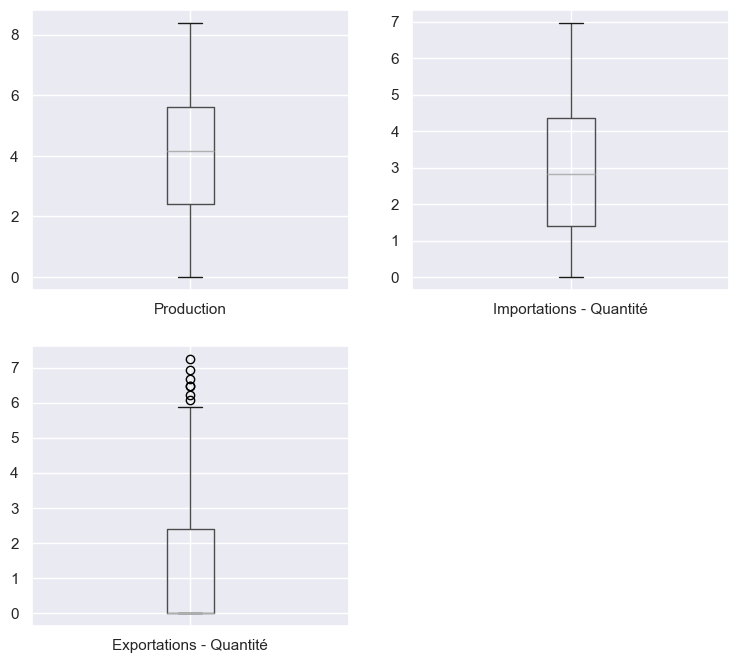

In [64]:
# Afficher des boxplot
plt.figure(figsize=(9, 8))
plt.subplot(221)
DF_clustering_log.boxplot(column = 'Production')
plt.subplot(222)
DF_clustering_log.boxplot(column = 'Importations - Quantité')
plt.subplot(223)
DF_clustering_log.boxplot(column = 'Exportations - Quantité')
plt.show()

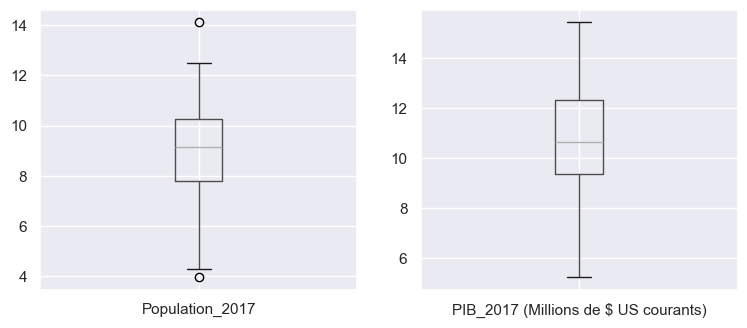

In [65]:
plt.figure(figsize=(9, 8))
plt.subplot(221)
DF_clustering_log.boxplot(column = 'Population_2017')
plt.subplot(222)
DF_clustering_log.boxplot(column = 'PIB_2017 (Millions de $ US courants)')
plt.show()

Grace a nos deux nettoayges successifs : 

- Supression de trois pays
- Application d'un log sur les données 

nous avons des données désormais exploitables dans le cadre d'un regroupement

## Export des dataframes nettoyés

In [73]:
DF_clustering_log.to_csv('DF_clustering_log.csv')

DF_clustering.to_csv('DF_clustering.csv')

ref_pays.to_csv('ref_pays.csv',index=False)


In [67]:
DF_clustering

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017
Zone,,,,,,,,
Afghanistan,1.53,28.0,29.0,0.0,36296.113,18753.46,5590.3810,-2.80
Afrique du Sud,35.69,1667.0,514.0,63.0,57009.756,381448.81,9353.5520,-0.28
Albanie,16.36,13.0,38.0,0.0,2884.169,13019.73,1603.5340,0.38
Algérie,6.38,275.0,2.0,0.0,41389.189,170096.99,1340.3900,-0.92
Allemagne,19.47,1514.0,842.0,646.0,82658.409,3690849.15,439.8984,0.59
...,...,...,...,...,...,...,...,...
Vanuatu,11.66,1.0,4.0,0.0,285.510,880.06,16346.3500,0.70
Viet Nam,12.33,918.0,291.0,1.0,94600.648,281353.61,9208.5540,0.23
Yémen,8.53,168.0,78.0,0.0,27834.819,26842.23,5317.2610,-2.94
